In [ ]:
#@title
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
data = pd.read_csv("https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv",sep=';', parse_dates=["_dt_notificacao"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Remoção dos casos diferentes de "Confirmado"

In [ ]:
indexParaRemover = data[data['_classificacao'] != 'Confirmado'].index
data.drop(indexParaRemover, inplace=True)

In [ ]:
data.head()

In [ ]:
data.tail()

1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [ ]:
data.shape

**Resposta**: Cada exemplo possui 39 atributos, sendo eles informados na célula a seguir:

In [ ]:
data.columns

2. Quantos casos confirmados há em Manaus, cumulativamente?

In [ ]:
data['_classificacao'].value_counts()

**Resposta:** No dataset constam 80420 casos confirmados, 126563 casos descartados e 37001 casos em análise

3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [ ]:
data["_dt_notificacao"].min(), data["_dt_notificacao"].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-12-29 00:00:00'))

**Resposta:** O período de tempo da base de dados é de 01/01/2020 até 29/12/2020.

# **2.1 Visão Geral dos Casos Confirmados**

### Na etapa abaixo, foi realizada a limpeza dos atributos não desejados para a análise: 

In [ ]:

data.drop(columns=['_dt_evolucao', '_dt_sintomas', '_origem', '_comorb_cardio',
       '_comorb_cromossomica', '_comorb_diabetes', '_comorb_hemato',
       '_comorb_hepatica', '_comorb_imuno', '_comorb_neurologica',
       '_comorb_obessidade', '_comorb_renal', '_comorb_respiratoria', '_etnia',
       '_gestante', '_profiss_saude', '_raca', '_se_notificacao',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_garganta',
       '_sintoma_tosse', '_sintoma_outros', '_srag','_criterio','_evolução','_faixa etária','_bairro_mapa','_distrito','_taxa'],inplace=True)


In [ ]:
data['_teste_pcr'].fillna(0.0,inplace=True)
data['_teste_anticorpo'].fillna(0.0,inplace=True)
data['_teste_antigeno'].fillna(0.0,inplace=True)
data['_teste_pcr'] = [int(x > 0.0) for x in data._teste_pcr]
data['_teste_anticorpo'] = [int(x > 0.0) for x in data._teste_anticorpo]
data['_teste_antigeno'] = [int(x > 0.0) for x in data._teste_antigeno]

In [ ]:
data.isna()

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro
130,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False
158,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
243970,False,False,True,False,False,False,False,False,True
243973,False,False,True,False,False,False,False,False,False
243977,False,False,True,False,False,False,False,False,False
243979,False,False,True,False,False,False,False,False,False


In [ ]:
num_ausentes = data.isna().sum()
porc_ausentes = data.isna().sum() * 100 / len(data)
df_ausentes = pd.DataFrame({
    'Coluna': data.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
_dt_notificacao,_dt_notificacao,25,0.031087
_classificacao,_classificacao,0,0.000000
_conclusao,_conclusao,37646,46.811738
_idade,_idade,25,0.031087
_sexo,_sexo,119,0.147973
_teste_anticorpo,_teste_anticorpo,0,0.000000
_teste_antigeno,_teste_antigeno,0,0.000000
_teste_pcr,_teste_pcr,0,0.000000
_bairro,_bairro,771,0.958717


In [ ]:
df = data.dropna(axis=0)
print(f"""\
Nº de linhas do DF original: {len(data)}
Nº de linhas do DF novo: {len(df)}
Nº de linhas com pelo menos 1 valor ausente: {
(len(data) - len(df))}""")

Nº de linhas do DF original: 80420
Nº de linhas do DF novo: 42685
Nº de linhas com pelo menos 1 valor ausente: 37735


### 1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [ ]:
print('Exemplos após Limpeza: ', data.shape[0])
print('Atributos após Limpeza: ', data.shape[1])

Exemplos após Limpeza:  80420
Atributos após Limpeza:  9


### 2. Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [ ]:
df['_conclusao'].value_counts(normalize=True)

Recuperado                 0.920394
Óbito                      0.078294
Óbito por outras causas    0.001312
Name: _conclusao, dtype: float64

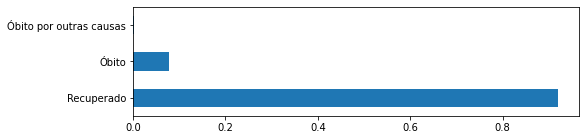

In [ ]:
df['_conclusao'].value_counts(normalize=True).plot.barh(figsize=(8, 2))

### 3.Os casos acometeram mais indivíduos do sexo masculino ou feminino?


In [ ]:
df['_sexo'].value_counts(normalize=True)

F    0.536535
M    0.463465
Name: _sexo, dtype: float64

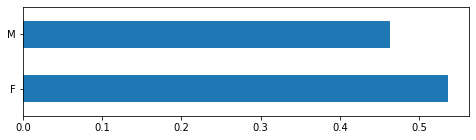

In [ ]:
df['_sexo'].value_counts(normalize=True).plot.barh(figsize=(8, 2))

### 4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [ ]:
print ('A média das idades é :', df['_idade'].mean(), 'anos.')

A média das idades é : 43.43167389012534 anos.


In [ ]:
print ('O desvio padrão das idades é ', df['_idade'].std(), '.' )

O desvio padrão das idades é  17.329733144236815 .


In [ ]:
print ('O indivíduo mais jovem possui ' , df['_idade'].min(), 'anos.')

O indivíduo mais jovem possui  0.0 anos.


In [ ]:
print ('O indivíduo mais velho possui', df['_idade'].max(), 'anos.')

O indivíduo mais velho possui 120.0 anos.


### 5. Qual o bairro com maior incidência de casos?


In [ ]:
df['_bairro'].value_counts()


SAO JOSE OPERARIO    2350
JORGE TEIXEIRA       1986
CIDADE NOVA          1819
COMPENSA             1817
ALVORADA             1814
                     ... 
SAO RAIMNDO             1
COLSANTO ANTONIO        1
GALILEIA ll             1
PRES. VARGAS            1
TAUMA                   1
Name: _bairro, Length: 1176, dtype: int64